# *z*-Scores and Probability

To generate a new problem and solution, select "*run all*" from the __Runtime__ menu. 


        What proportion of the normal distribution corresponds to z-score values
         less than -2.94


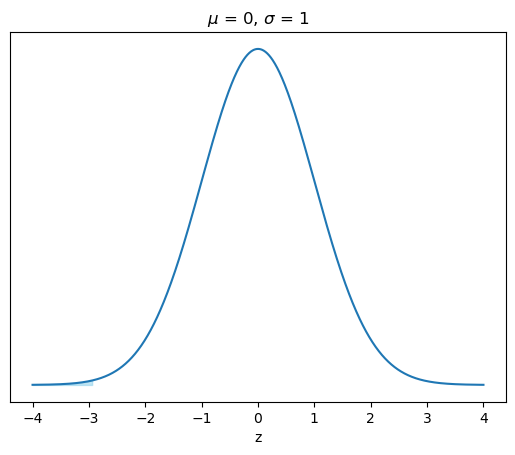

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import Markdown, display
import seaborn as sns

# function to determine the question.  returns the z-score(s) for the problem
def generate_question():
    roll = random.randint(1,3)
    z_1 = round(random.uniform(-3,3), 2)
    values = [roll, z_1]
    if roll == 1:
        question = f"""
        What proportion of the normal distribution corresponds to z-score values
         greater than {z_1}"""
    elif roll == 2: 
        question = f"""
        What proportion of the normal distribution corresponds to z-score values
         less than {z_1}"""
    else:
        z_2 = round(random.uniform(1,4), 2)
        values.append(z_2)
        question = f"""
        What proportion of the normal distribution corresponds to z-score values
        between {z_1} and {z_2}?"""
    
    print(question)
    return values


# function to generate the distribution plot and shaded region
def generate_plot(z: list): 
    mean = 0
    sd = 1

    # generate x values
    x = np.linspace(mean - 4*sd, mean + 4*sd, 1000)

    # generate y values
    y = stats.norm.pdf(x, mean, sd)

    plt.plot(x, y)
    plt.title(f"$\\mu$ = {mean}, $\\sigma$ = {sd}")
    plt.xlabel('z')
    plt.grid(False)
    plt.yticks([])
    
    if z[0] == 1:
         plt.fill_between(x, y, where=(x >= z[1]), color='skyblue', alpha=0.5)
    elif z[0] == 2:
         plt.fill_between(x, y, where=(x <= z[1]), color='skyblue', alpha=0.5)
    else:
        vals = sorted([z[1], z[2]])
        plt.fill_between(x, y, where=(x >= vals[0]) & (x <= vals[1]), color='skyblue', alpha=0.5)
  
      
    plt.show()


z_scores = generate_question()
generate_plot(z_scores)

In [7]:
def problem_solution(data: list):
    if data[0] == 1:
        answer = 1 - round(stats.norm.cdf(data[1]), 4)
        text = f"p(z > {data[1]}) = {round(answer, 4)}"
    elif data[0] == 2:
        answer = round(stats.norm.cdf(data[1]), 4)
        text = f"p(z < {data[1]}) = {round(answer, 4)}"
    else:
        dvals = sorted([data[1], data[2]])
        answer = round(stats.norm.cdf(dvals[1]), 4) - round(stats.norm.cdf(dvals[0]), 4)
        text = f"p({dvals[0]} < z < {dvals[1]}) = {round(answer, 4)}"

    return text


print(problem_solution(z_scores))

p(z < -2.94) = 0.0016
